In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Perceptron    # Used for simple linear classification tasks.

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from tensorflow.keras.models import Sequential     # Sequential lets you build a neural network layer-by-layer in Keras.

from tensorflow.keras.layers import Dense     #Dense makes the final predictions
from tensorflow.keras.layers import Conv2D     # Conv2D extracts features
from tensorflow.keras.layers import Flatten    # Flatten reshapes them

from tensorflow.keras.layers import MaxPooling2D     # MaxPooling2D reduces size
from tensorflow.keras.layers import Dropout          # Dropout prevents overfitting

from tensorflow.keras.utils import to_categorical     # converts numeric class labels into one-hot encoded format for training classification models

In [2]:
from google.colab import files
uploaded = files.upload()

Saving mnist_train.csv to mnist_train.csv


In [3]:
from google.colab import files
uploaded = files.upload()

Saving mnist_test.csv to mnist_test.csv


In [4]:
df = pd.read_csv("mnist_train.csv")
df_test = pd.read_csv("mnist_test.csv")

In [5]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_test.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df.shape

(60000, 785)

In [8]:
df.columns

Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)

In [9]:
df.columns

Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)

In [10]:
df.isnull().sum()

,0
label,0
1x1,0
1x2,0
1x3,0
1x4,0
...,...
28x24,0
28x25,0
28x26,0
28x27,0


# Preprocessing

In [11]:
x_train = df.drop("label", axis=1).values
y_train = df["label"].values
x_test = df_test.drop("label", axis=1).values
y_test = df_test["label"].values

In [12]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [13]:
x_train_img = x_train.reshape(-1, 28, 28)
x_test_img = x_test.reshape(-1, 28, 28)

In [14]:
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Perceptron

In [15]:
perceptron = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(10, activation="softmax")
])

In [16]:
perceptron.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

In [17]:
history_percp = perceptron.fit(x_train_img, y_train_cat, epochs=5, batch_size=32, validation_data=(x_test_img, y_test_cat), verbose=1)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7163 - loss: 1.1198 - val_accuracy: 0.8803 - val_loss: 0.4794
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8758 - loss: 0.4795 - val_accuracy: 0.8931 - val_loss: 0.3995
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8898 - loss: 0.4107 - val_accuracy: 0.9014 - val_loss: 0.3668
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8960 - loss: 0.3787 - val_accuracy: 0.9064 - val_loss: 0.3485
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8994 - loss: 0.3667 - val_accuracy: 0.9079 - val_loss: 0.3348


In [18]:
acc_percp = perceptron.evaluate(x_test_img, y_test_cat, verbose=0)[1]
acc_percp

0.9078999757766724

# ANN

In [21]:
ann = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation="relu"),
    Dense(64, activation="relu"),
    Dense(10, activation="softmax")
])

In [22]:
ann.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [23]:
history_ann = ann.fit(x_train_img, y_train_cat, epochs=5, batch_size=32, validation_data=(x_test_img, y_test_cat), verbose=1)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8741 - loss: 0.4278 - val_accuracy: 0.9583 - val_loss: 0.1345
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9680 - loss: 0.1083 - val_accuracy: 0.9684 - val_loss: 0.1024
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9770 - loss: 0.0716 - val_accuracy: 0.9736 - val_loss: 0.0820
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9843 - loss: 0.0485 - val_accuracy: 0.9751 - val_loss: 0.0834
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9873 - loss: 0.0393 - val_accuracy: 0.9769 - val_loss: 0.0808


In [24]:
acc_ann = ann.evaluate(x_test_img, y_test_cat, verbose=0)[1]
acc_ann

0.9768999814987183

# CNN

In [27]:
x_train_cnn = x_train.reshape(-1, 28, 28,1)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)

In [28]:
cnn = Sequential([
    Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation="relu"),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(10, activation="softmax")
])

In [29]:
cnn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [30]:
history_cnn = cnn.fit(x_train_cnn, y_train_cat, epochs=5, batch_size=32, validation_data=(x_test_cnn, y_test_cat), verbose=1)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 34ms/step - accuracy: 0.8690 - loss: 0.4187 - val_accuracy: 0.9834 - val_loss: 0.0489
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.9770 - loss: 0.0786 - val_accuracy: 0.9878 - val_loss: 0.0390
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9845 - loss: 0.0510 - val_accuracy: 0.9904 - val_loss: 0.0271
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 33ms/step - accuracy: 0.9869 - loss: 0.0425 - val_accuracy: 0.9914 - val_loss: 0.0276
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.9888 - loss: 0.0365 - val_accuracy: 0.9900 - val_loss: 0.0328


In [31]:
acc_cnn = cnn.evaluate(x_test_cnn, y_test_cat, verbose=0)[1]
acc_cnn

0.9900000095367432

# Visualization

In [33]:
def plot_training(history, title):
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label="Train")
    plt.plot(history.history['val_accuracy'], label="Val")
    plt.title(f"{title} Accuracy")
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label="Train")
    plt.plot(history.history['val_loss'], label="Val")
    plt.title(f"{title} Loss")
    plt.legend()
    plt.show()


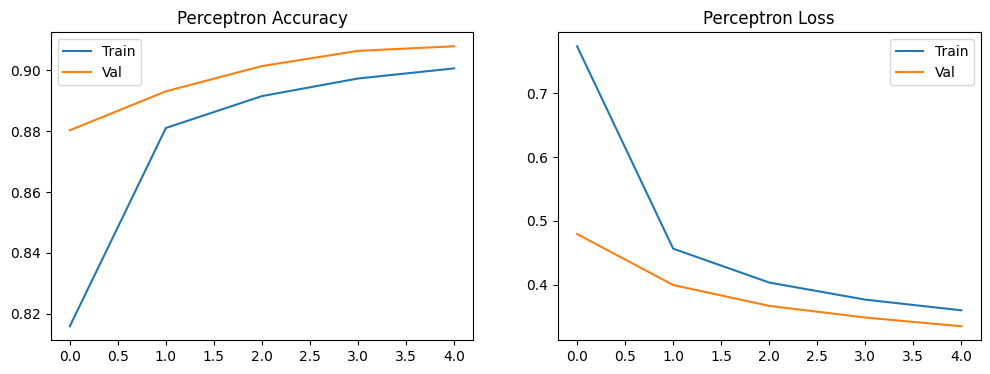

In [34]:
plot_training(history_percp, "Perceptron")

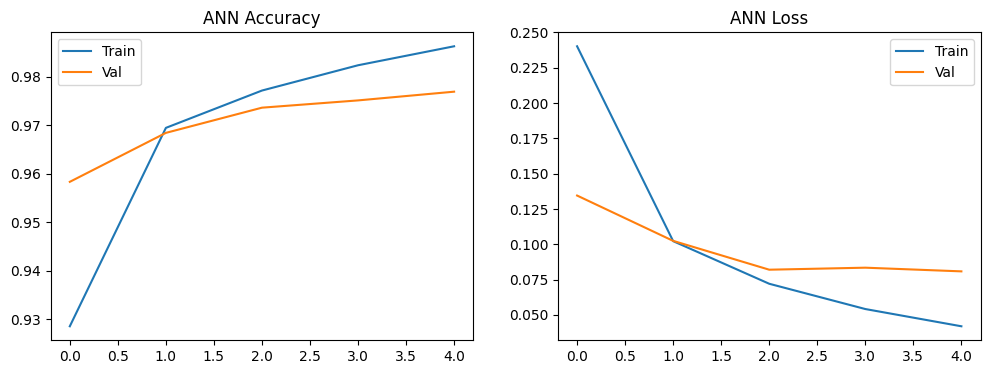

In [35]:
plot_training(history_ann, "ANN")

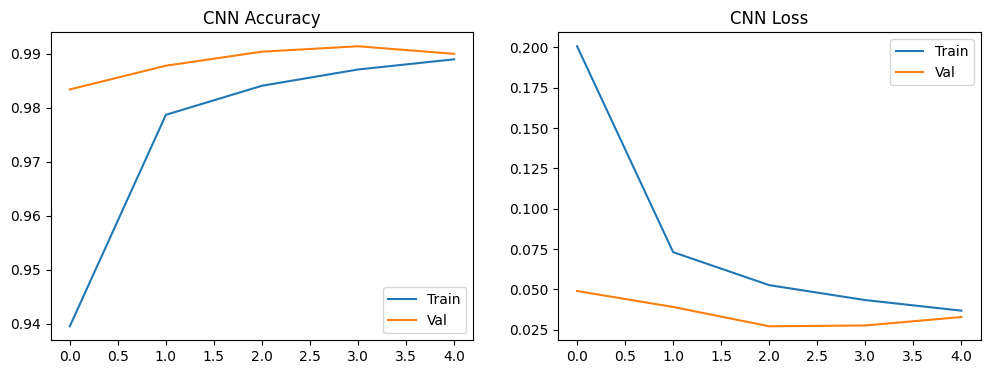

In [36]:
plot_training(history_cnn, "CNN")

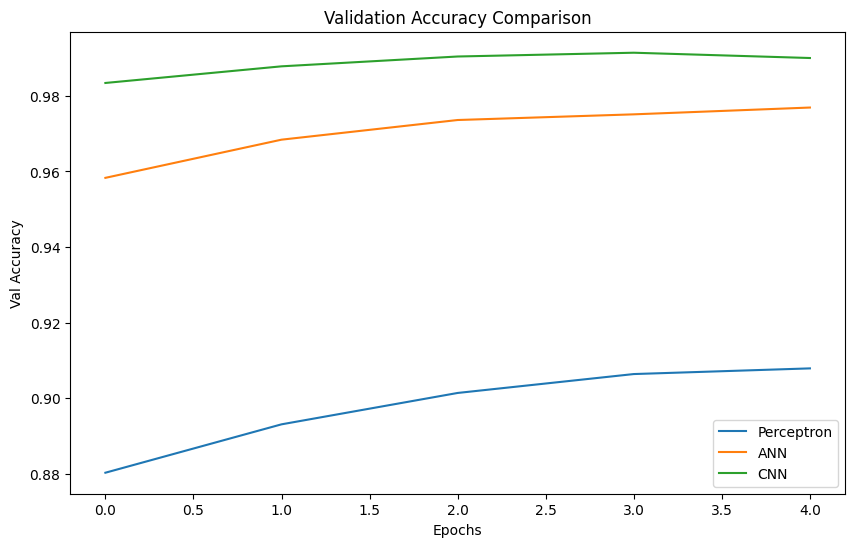

In [37]:
plt.figure(figsize=(10,6))
plt.plot(history_percp.history['val_accuracy'], label="Perceptron")
plt.plot(history_ann.history['val_accuracy'], label="ANN")
plt.plot(history_cnn.history['val_accuracy'], label="CNN")
plt.title("Validation Accuracy Comparison")
plt.xlabel("Epochs")
plt.ylabel("Val Accuracy")
plt.legend()
plt.show()

In [38]:
def show_side_by_side(models, model_names, X, X_cnn, y_true, n=5):
    idxs = np.random.choice(len(X), n, replace=False)
    plt.figure(figsize=(15, 6))
    for i, idx in enumerate(idxs):
        plt.subplot(2, n, i+1)
        plt.imshow(X[idx].reshape(28, 28), cmap="gray")
        plt.axis("off")
        plt.title(f"True: {y_true[idx]}")
        preds = [np.argmax(model.predict(X_cnn[idx].reshape(1, 28, 28, 1) if name == "CNN" else X[idx].reshape(1, 28, 28)))
                 for model, name in zip(models, model_names)]
        plt.subplot(2, n, n+i+1)
        plt.axis("off")
        plt.title("\n".join(f"{n}: {p}" for n, p in zip(model_names, preds)))
    plt.tight_layout()
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


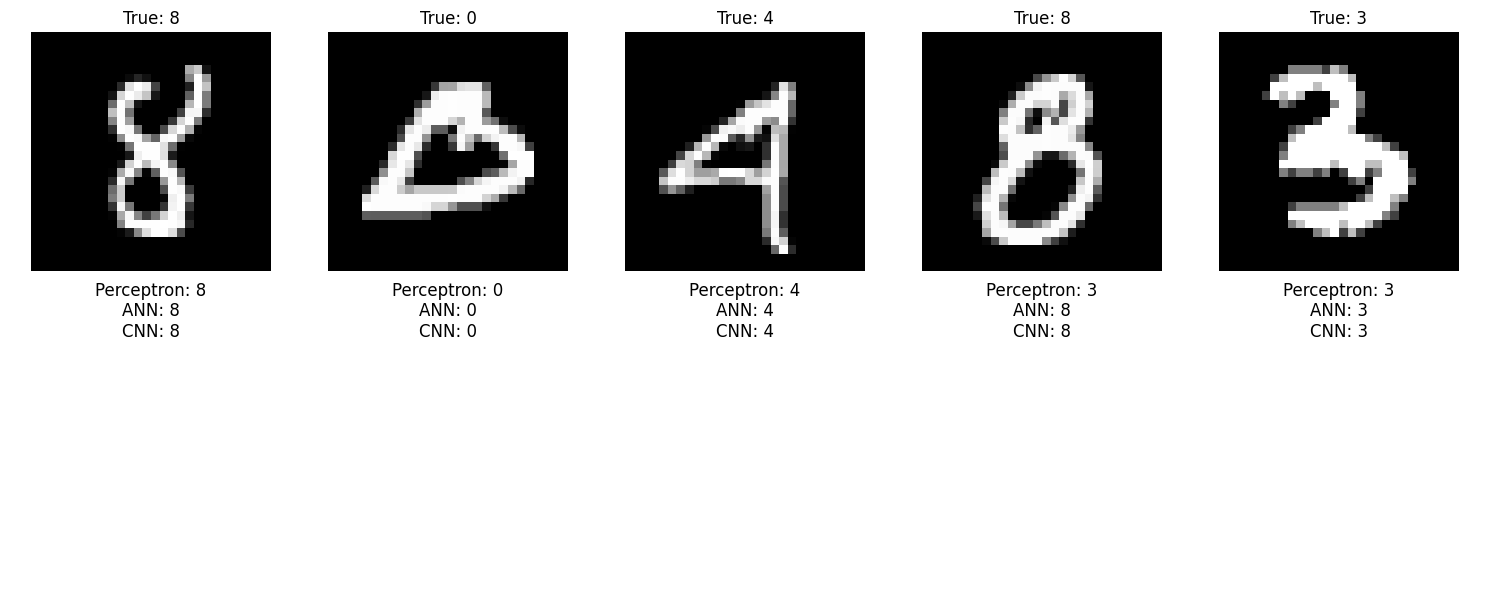

In [42]:
show_side_by_side([perceptron, ann, cnn], ["Perceptron", "ANN", "CNN"], x_test_img, x_test_cnn, y_test, 5)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step


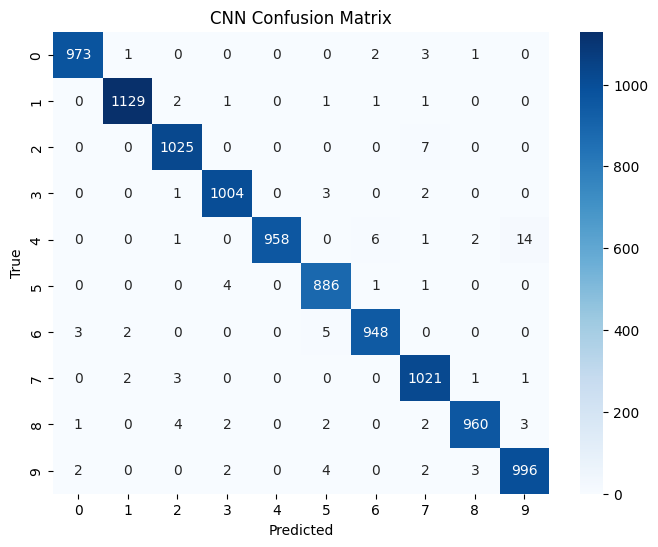

In [43]:
y_pred_cnn = np.argmax(cnn.predict(x_test_cnn), axis=1)
cm = confusion_matrix(y_test, y_pred_cnn)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("CNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

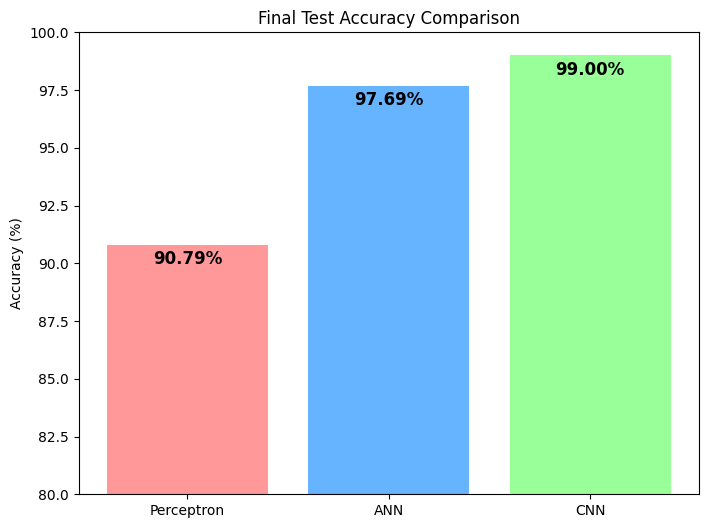

In [44]:
final_accs = [acc_percp*100, acc_ann*100, acc_cnn*100]
models = ["Perceptron", "ANN", "CNN"]

plt.figure(figsize=(8,6))
bars = plt.bar(models, final_accs, color=['#ff9999','#66b3ff','#99ff99'])
plt.title("Final Test Accuracy Comparison")
plt.ylabel("Accuracy (%)")
for bar, acc in zip(bars, final_accs):
    plt.text(bar.get_x()+bar.get_width()/2, bar.get_height()-1, f"{acc:.2f}%",
             ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.ylim(80, 100)
plt.show()